In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A=np.random.randint(1,10,(30,100))
print(np.linalg.matrix_rank(A))
x0=np.random.randint(1,10,(100,1))
b=np.dot(A,x0)

30


In [3]:
tot_iter=100
epsilon=1e-10
def f(x):
    #caculate f(x)
    func=np.sum(x*np.log(x))
    return func

def nable_f(x):
    #caculate nable_f(x)
    func=1+np.log(x)
    return func

def nable2_f(x):
    func=np.eye(100)
    for i in range(100):
        func[i,i]=1/x[i]
    return func


def d_nt(x):
    aa=np.zeros((130,130))
    for i in range(100):
        aa[i,i]=1/x[i]
    aa[100:,0:100]=A
    aa[0:100,100:]=np.transpose(A)
    bb=np.zeros((130,1))
    bb[0:100]=nable_f(x)
    bb[100:]=np.dot(A,x)-b
    bb=-bb
    xx=np.linalg.solve(aa,bb)
    d=xx[0:100,:]
    return d

def lam2(x):
    dd=d_nt(x)
    func=np.dot(np.dot(np.transpose(dd),nable2_f(x)),dd)
    return func

def judge(x,arr):
    #save each error of epoch
    #if it is less or equal epsilon, then return false, else return true
    l=0.5*lam2(x)
    arr.append(l)
    if l > epsilon and len(arr)<tot_iter:
        return True
    return False

def good_x(a,b):
    x=x0
    error=[]
    k=0
    while judge(x,error):
        direction=d_nt(x)
        t=1
        while f(x+t*direction)> f(x)-a*t*lam2(x):
            t=b*t
        x=x+t*direction
        
        k=k+1
    
    return x,k,error

In [4]:
alpha=0.1
beta=0.7
x,k,error=good_x(alpha,beta)
while len(error)<100:
    error.append(error[-1])
error=np.array(error).reshape(100)
print(x)
print(f(x))

[[5.01837064]
 [5.46203464]
 [2.38862035]
 [6.11736489]
 [4.24650852]
 [3.89548446]
 [6.32135319]
 [3.69988616]
 [1.80941948]
 [4.78330169]
 [5.49005588]
 [9.18009557]
 [3.6896051 ]
 [4.97795143]
 [3.56173613]
 [4.66672926]
 [6.60690174]
 [6.92765106]
 [3.58106784]
 [4.23547375]
 [2.71968441]
 [3.90190455]
 [5.59315726]
 [6.65810138]
 [9.82414699]
 [5.88970746]
 [4.65392585]
 [3.30555735]
 [5.94394151]
 [5.68688328]
 [2.96621988]
 [5.18467327]
 [4.65363468]
 [3.51857693]
 [3.78755188]
 [1.78156548]
 [4.23354898]
 [8.14965725]
 [6.07479846]
 [6.31271667]
 [9.71722696]
 [4.4212465 ]
 [6.49981968]
 [4.99339475]
 [6.93922001]
 [3.31847858]
 [5.19239201]
 [3.49407496]
 [4.8342019 ]
 [4.46891383]
 [4.8965893 ]
 [4.69042471]
 [7.13014288]
 [2.07417081]
 [7.31561648]
 [3.93284029]
 [7.97280723]
 [4.35962798]
 [3.58056283]
 [4.60473973]
 [3.49918433]
 [5.58341909]
 [7.51506636]
 [2.78223116]
 [6.20670437]
 [4.1652926 ]
 [9.05275968]
 [5.476821  ]
 [2.76867054]
 [7.16827128]
 [3.97207343]
 [3.05

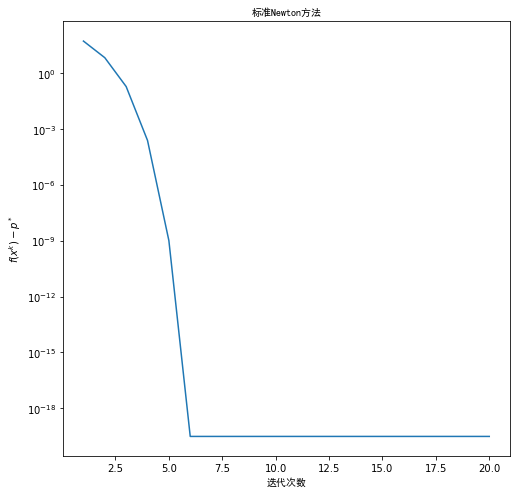

In [5]:
k=np.array([i+1 for i in range(100)])
plt.rcParams['figure.figsize']=(8,8)
plt.plot(k[0:20],error[0:20],label="$\alpha=0.1,\beta=0.7$")
plt.xlabel("迭代次数",fontproperties='simhei')
plt.ylabel("$f(x^k)-p^*$")
plt.title("标准Newton方法",fontproperties='simhei') 
plt.yscale('log')
plt.show()